# A primer on the normal distribution

## Introduction
New students in science and mathematics may have seen a figure such as the one below. 

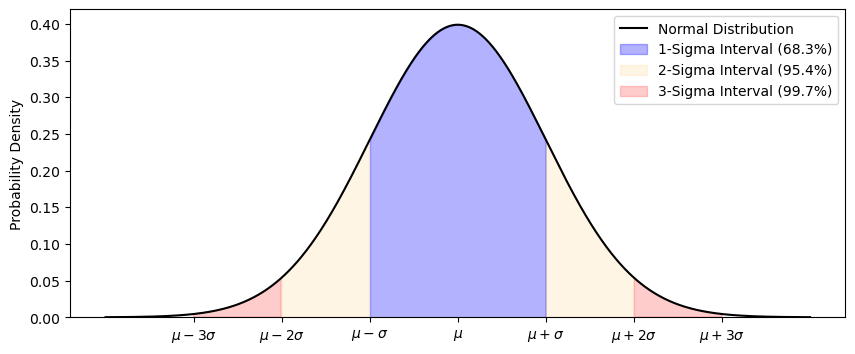

In [1]:
#For the full code generating the figure below, check my GitHub
import numpy as np
import matplotlib.pyplot as plt

mu,sigma = 0,1

x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = np.exp(-(x-mu)**2/(2*sigma**2))/(np.sqrt(2*np.pi)*sigma) #gaussian pdf

plt.figure(figsize=(10, 4))
plt.plot(x, y, label='Normal Distribution',color='k')

plt.fill_between(x, y, where=np.abs(x-mu) <= sigma, color='blue', alpha=0.3, label='1-Sigma Interval (68.3%)')
plt.fill_between(x, y, where=np.logical_and(np.abs(x-mu) <= 2*sigma,np.abs(x-mu) > sigma), color='orange', alpha=0.1, label='2-Sigma Interval (95.4%)')
plt.fill_between(x, y, where=np.logical_and(np.abs(x-mu) <= 3*sigma,np.abs(x-mu) > 2*sigma), color='red', alpha=0.2, label='3-Sigma Interval (99.7%)')

# Set xticks to mu, mu+/-1sigma, mu+/-2sigma, mu+/-3sigma
xticks = [mu - 3*sigma, mu - 2*sigma, mu - sigma, mu, mu + sigma, mu + 2*sigma, mu + 3*sigma]
xticklabels = [r'$\mu-3\sigma$', r'$\mu-2\sigma$', r'$\mu-\sigma$', r'$\mu$', r'$\mu+\sigma$', r'$\mu+2\sigma$', r'$\mu+3\sigma$']
plt.xticks(xticks, xticklabels)
plt.ylim(0,.42)

plt.ylabel('Probability Density')
plt.legend()

plt.savefig('normal.png',dpi=700)
plt.show()


This figure illustrates the [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution), also known to as the [Gaussian distribution](https://en.wikipedia.org/wiki/Gaussian_function), which is a fundamental concept in statistics and probability theory. The normal distribution is characterized by its bell-shaped curve, as we can see above, that is symmetric around its mean, $\mu$, and has a "bandwidth" proportional to the parameter $\sigma$, whose square is the variance. The form of the curve above is written as
$$ p(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}} \equiv \text{Normal}(x|\mu,\sigma) \ , \quad \quad (1) $$
with $\equiv$ meaning "defined to be equal to". As the number of variables sampled from the normal distribution increases, their [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation) converges to $\sigma$. Therefore, though technically an oversimplification, $\sigma$ is commonly referred to as the distribution's standard deviation.

Often, the explanations following the graph and equation above say that a variable following a normal distribution will have:

- $68.3\%$ probability of being within $\mu \pm \sigma$ (1 $\sigma$ interval),
- $95.4\%$ probability of being within $\mu \pm 2\sigma$  (2 $\sigma$ interval),
- $99.7\%$ probability of being within $\mu \pm 3\sigma$  (3 $\sigma$ interval).

However, more often than not, this is not proven or justified when it is first presented. It is taken for granted that students will immediately understand the normal distribution, to the point that the notation $\mu \pm \sigma$ is taught in the first experimental physics course with even less context than what was written so far. The natural question is: WHY? why is the normal distribution so important? and can where does the $(68.3, 95.4, 99.7)$ rule comes from? 

Here I will do my best to further demystify the normal distribution and its properties in a way that is accessible to a young scientist such as someone who is just starting their first course on calculus. In particular by answering the second question in the  previous paragraph, I will present a method that allows one to calculate the probability of any interval, rather than only within $1\sigma$,$2\sigma$, or $3\sigma$.


## Why is the normal distribution so important?


>  <span style="font-size: larger;"> I am pretty </span> $ \LARGE \frac{1}{\sqrt{2\pi \sigma^2} } e^{-\frac{(x-\mu)^2}{2\sigma^2}}$<span style="font-size: larger;"> .   Are you </span> $ \LARGE \frac{1}{\sqrt{2\pi \sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}} \  ?$<span style="font-size: larger;">  </span>
<br> Prof. Steve Pressé, PI of [Pressé Lab](https://labpresse.com/)


As a brief example of a real-world quantity following the normal distribution, we use the mass of penguins obtained using the `penguins` dataset, accessible through the `seaborn` library. For further details on data collection, refer to the [Palmer Penguins repository](https://github.com/allisonhorst/palmerpenguins). In this instance, we will examine the distribution of mass among male penguins of the "gentoo" species, highlighting its approximation to a normal distribution.

In [2]:
import numpy as np
import seaborn as sns

penguins = sns.load_dataset("penguins")
mass = (penguins[np.logical_and(penguins['sex']=='Male',  penguins['species']=='Gentoo')]['body_mass_g']).to_numpy()

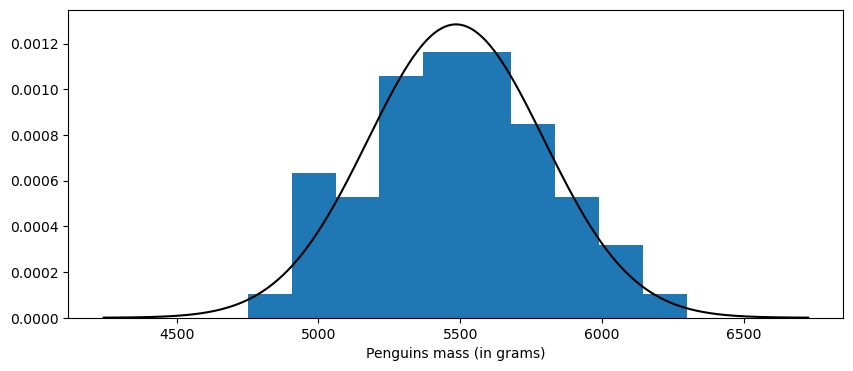

In [3]:
#For the full code generating the figure below, check my GitHub
mass = mass[~np.isnan(mass)]

mu,sigma = mass.mean(),mass.std()

x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = np.exp(-(x-mu)**2/(2*sigma**2))/(np.sqrt(2*np.pi)*sigma)

plt.figure(figsize=(10, 4))
plt.plot(x, y, label='Normal Distribution',color='k')
plt.hist(mass,density=True)
plt.xlabel('Penguins mass (in grams)')

plt.savefig('normal_penguin.png',dpi=700)
plt.show()

For the full code generating the figure above, see my [GitHub repository](https://github.com/PessoaP/blog/blob/master/Normal/normal.ipynb)

Upon examining the plot, several questions may emerge. While the normal distribution appears to be a reasonable approximation, deviations, particularly at lower masses, are noticeable. This discrepancy could be attributed to the limited size of the dataset, which comprises only 61 male gentoo penguins. This observation raises the question of whether this variable truly follows a normal distribution.


It is, nevertheless, common practice to assume that many datasets will follow the normal distribution. Such assumption is often justified by the [central limit theorem](https://en.wikipedia.org/wiki/Central_limit_theorem), which states that the sum of a large number of independently distributed random variables, each with finite mean and variance, will be approximately normally distributed, regardless of the underlying distribution. This theorem is a cornerstone of statistics because it implies that  methods that work for normal distributions can be applicable to many problems involving other types of distributions. It is still relevant, however, to verify if the conditions of the central limit theorem are valid, [as failing to do so can lead to drastically incorrect results](https://labpresse.com/why-do-we-need-bayesian-statistics-part-ii-the-lighthouse-problem-tutorial/). 

## Visualize the central limit theorem

Although it is not my goal to explain the central limit theorem in detail, we can illustrate its significance through programming with random variables. First, let us sample a large number of values uniformly distributed between $0$ and $1$, draw its histogram, and compare it to the normal distribution with the same mean and variance.

In [4]:
np.random.seed(42)
sam = np.random.uniform(size=10000)

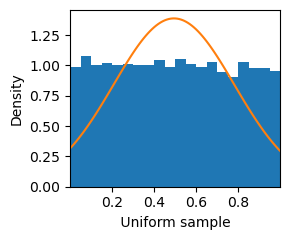

In [5]:
#Remove from final post
def present_gaussian(ax,s):
    ax.hist(s,density=True,bins=20)
    x = np.linspace(s.min(),s.max(),101)
    mu,sigma = s.mean(),s.std()
    ax.plot(x, np.exp(-(x-mu)**2/(2*sigma**2))/(np.sqrt(2*np.pi)*sigma) )
    ax.set_xlim(s.min(),s.max())
    
fig, ax = plt.subplots(1,1,figsize=(3,2.5))
present_gaussian(ax,sam)
ax.set_xlabel(' Uniform sample ')
ax.set_ylabel('Density')
plt.tight_layout()
plt.savefig('uniform1.png',dpi=600)

This is not a good fit, however, let us observe the same visualization for the sum of two independent uniformly sampled values.

In [6]:
sam2 = np.random.uniform(size=10000)
sam_sum = sam+sam2

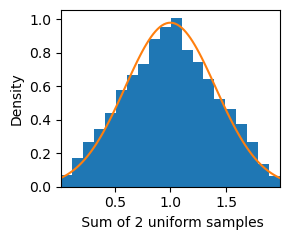

In [7]:
#For the full code, check my GitHub
fig, ax = plt.subplots(1,1,figsize=(3,2.5))
present_gaussian(ax,sam_sum)
ax.set_xlabel(' Sum of 2 uniform samples')
ax.set_ylabel('Density')
plt.tight_layout()
plt.savefig('uniform2.png',dpi=600)


Here, we notice that the fit to a normal distribution is considerably better, and it improves as we consider the sum of a larger number of independently and identically distributed variables.


In [8]:
sam = [sam,sam2]
for i in range(2,8):
    sam.append(np.random.uniform(size=10000))

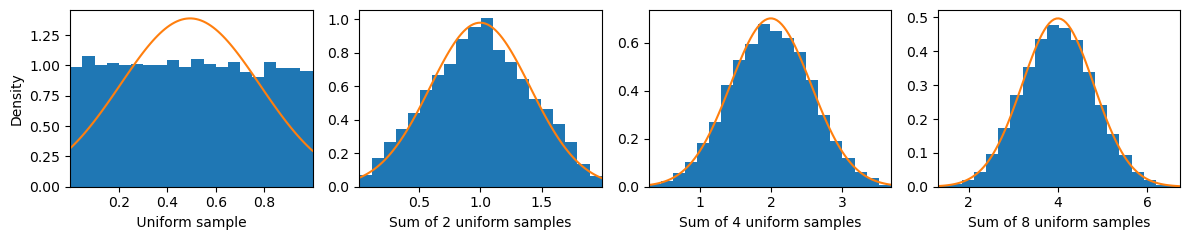

In [9]:

#For the full code generating the figure below, check my GitHub
fig, ax = plt.subplots(1,4,figsize=(12,2.5))
for (axi,i) in zip(ax,[1,2,4,8]):
    s = 0
    for j in range(i):
        s+=sam[j]
    present_gaussian(axi,s)
    if i == 1:
        axi.set_xlabel(' Uniform sample ') 
    else:
        axi.set_xlabel('Sum of {} uniform samples'.format(i))
ax[0].set_ylabel('Density')
plt.tight_layout()
plt.savefig('uniformall.png',dpi=600)

Now, to demonstrate that this phenomenon is not exclusive to uniformly distributed values, we observe a similar approximation to the normal distribution using plots for the sum of [exponentially distributed](https://numpy.org/doc/stable/reference/random/generated/numpy.random.exponential.html) values. 

In [10]:
sam_exp = np.random.exponential(size=(250,10000))

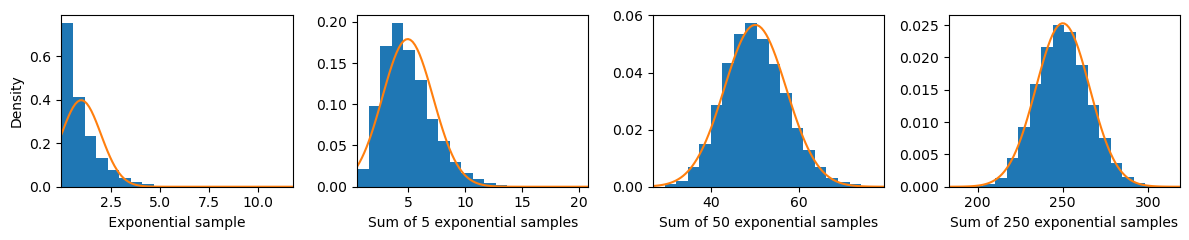

In [11]:
#For the full code generating the figure below, check my GitHub
fig, ax = plt.subplots(1,4,figsize=(12,2.5))
for (axi,i) in zip(ax,[1,5,50,250]):
    s = sam_exp[:i].sum(axis=0)
    present_gaussian(axi,s)
    if i == 1:
        axi.set_xlabel(' Exponential sample ')  # Singular, without "sum of"
    else:
        axi.set_xlabel('Sum of {} exponential samples'.format(i))
ax[0].set_ylabel('Density')
plt.tight_layout()
plt.savefig('exponentialall.png',dpi=600)

In real-world scenarios, the argumentation becomes slightly more complex. However, we can imagine that some macroscopic variables, such as the mass and height of animals, are built upon the accumulation of a large number of small changes and, as such, could be approximated by a normal distribution. Similarly, the diffusion of objects observed in phenomena like [Brownian motion](https://en.wikipedia.org/wiki/Brownian_motion) results from the sum of numerous small collisions. Each of these collisions, though random and independent, collectively contributes to a movement pattern that, over time, can be described by a normal distribution. This demonstrates that whether we are examining physical phenomena at a microscopic level or looking at larger or more complex systems the central limit theorem provides a powerful tool for understanding the underlying distributions that govern these processes. 

##  Where does the $(68.3, 95.4, 99.7)$ rule comes from? Integrating the normal distribution

> <span style="font-size: larger;">  All a physicist needs to know is how to integrate Gaussians. </span> <br> Prof. [Renato Vicente](https://www.ime.usp.br/~rvicente/), my undergraduate instructor of numerical analysis 

The significance of the normal distribution often becomes nebulous even for experienced scientists in some fields. Eq. (1) represents the probability density, indicating how likely it is to obtain a value at any point along the $x$-axis. The area under the curve, in other words the integral, corresponds to the probability of observing a value within a certain range. In calculus terms, we would say that the probability for a variable that follows the normal distribution to be observed within an interval $(a,b)$ is given by 
$$ P(a<x<b) = \int_a^b \mathrm{d}x \ p(x) = \int_a^b \mathrm{d}x \frac{1}{\sqrt{2\pi \sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}} \ .   \quad \quad (2) $$
Note that we use capital $P$ to represent the probability of the interval (the integral) while $p$ is reserved for the probability density (integrand).

### The standard normal

To calculate the integral in (2), a useful trick is to transform from $x$ to $z$, where $z$ is defined as 
$$ z \equiv \frac{x-\mu}{\sigma} \ .  \quad \quad (3) $$
From this, we can express the probability of an interval in terms of $z$ instead of $x$. Let us see what this change of variables from $x$ to $z$ does in the illustration below
<figure>
    <img src="TikZfig-8.png" alt=sym_interval width="650">
</figure>


Transforming the probability accordingly means that, for whichever interval $(a,b)$ we must have
$$ P(a<x<b) = P\left( \frac{a-\mu}{\sigma} < z < \frac{b-\mu}{\sigma}  \right) \ , $$
or, equivalently,
$$  \int_a^b \mathrm{d}x \ p(x) =  \int_{\frac{a-\mu}{\sigma}}^{\frac{b-\mu}{\sigma}} \mathrm{d}z \ p(z) \ . $$
Through calculus considerations, this means that the probability density for $z$ is obtained as 
$$ p(z) = p(x) \frac{\mathrm{d}x}{\mathrm{d}z} \ .$$
leading to a $p(z)$ of the form 
$$ p(z) = \frac{1}{\sqrt{2\pi \sigma^2}} e^{-\frac{z^2}{2}} \sigma = \frac{1}{\sqrt{2\pi}} e^{-\frac{z^2}{2}} = \text{Normal}(z|0,1)  \ . $$
In summary, $z$ defined in (3)  has normal distribution with mean 0 and variance 1. 
Due to the importance of this trick, $\text{Normal}(z|0,1)$ is often termed the [standard normal](https://www.sciencedirect.com/topics/mathematics/standard-normal-distribution).

Thus, with the transformation of $z$ in hands, we can return to the question of finding what if the probability of $x$ being within the interval $(a,b)$ as
$$ P(a<x<b) =  \int_{\frac{a-\mu}{\sigma}}^{\frac{b-\mu}{\sigma}} \mathrm{d}z \  \left( \frac{1}{\sqrt{2\pi}} e^{-\frac{z^2}{2}} \right) . \ \quad \quad (4) $$
However, despite the simplification given by the trick, the challenge continues because **there is no analytic, closed-form expression for the integral of $e^{-\frac{z^2}{2}}$.** There is, nevertheless [methods to calculate the integral on the full real line](https://quantummechanics.ucsd.edu/ph130a/130_notes/node87.html), obtaining  $\int_{-\infty}^{\infty} dz \ e^{-\frac{z^2}{2}} = \sqrt{2 \pi}$.

### Error function

Despite having no closed-form analytic expression for the integral in (4), one way to obtain the probability through numerical methods involves defining the error function, denoted as $\text{erf}(y)$, as
$$ \ \text{erf}(y) \equiv \frac{2}{\sqrt{\pi}} \int_0^y \mathrm{d}t \  e^{-t^2}\ . \ \quad \quad (5) $$
Most scientific calculations and numerical programing libraries provide a calculation of $\text{erf}$, for example in `python` one can use [the scipy erf implementation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.erf.html). By substituting the error function in (4) we obtain the probability of an interval as
$$ P(a<x<b) = \frac{1}{2} \left[ \text{erf}\left(\frac{b-\mu}{\sqrt{2} \sigma}\right)  - \text{erf}\left(\frac{a-\mu}{\sqrt{2} \sigma} \right) \right]. \ \quad \quad (6) $$

Now, it can be useful in many applications to work on symmetric intervals around the mean $\mu$. Meaning, if $(a,b)$ can be written in the form $(\mu-\xi \sigma,\mu+\xi \sigma)$,

<figure>
    <img src="TikZfig-9.png" alt=sym_interval width="600">
</figure>

the set of $x$ such that $(a<x<b)$ is equivalent to the set for which $\frac{|x-\mu|}{\sigma} < \xi $. Thus we find the probability of a symmetric interval, from (6) as 
$$ P\left(\frac{|x-\mu|}{\sigma} < \xi \right)  = \frac{1}{2} \left[ \text{erf}\left(\frac{\xi}{\sqrt{2}}\right)  - \text{erf}\left(\frac{ - \xi}{\sqrt{2}} \right) \right]. \ \quad \quad $$
Now, one can notice, from (5), that $\text{erf}(y) = - \text{erf}(-y)$. Thus we have
$$ P\left(\frac{|x-\mu|}{\sigma} < \xi \right) = \text{erf}\left(\frac{\xi}{\sqrt{2}}\right)  \ . \ \quad \quad (7) \\ $$

Now, we can use the [erf implementation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.erf.html) to see what is the probability of these different intervals of varying $\xi$. Let us see it in the form of a table


In [12]:
from scipy.special import erf

xi_full = np.arange(0, 4.1, 0.1)
xi_sqrt2_full = xi_full / np.sqrt(2)
erf_xi_full = erf(xi_sqrt2_full)

In [13]:
#For the code generating the table below, check my GitHub
import pandas as pd

df_combined = pd.DataFrame()
segments_start = np.arange(4)

unique_columns = [f"{col}" for i in segments_start for col in [r'$\xi$', r'$\frac{\xi}{\sqrt{2}}$', r'erf$\left(\frac{\xi}{\sqrt{2}}\right)$','       ']]
flattened_data = []

for start in segments_start:
    indices = np.where((xi_full >= start) & (xi_full < start + 1))[0]
    
    xi_segment = xi_full[indices].round(1)
    xi_sqrt2_segment = xi_sqrt2_full[indices].round(2)
    erf_xi_segment = [' {0:.6f} '.format(e) for e in erf_xi_full[indices].round(6)]
    
    flattened_data.extend([xi_segment, xi_sqrt2_segment, erf_xi_segment,len(xi_segment)*['']])

df_combined = pd.DataFrame(np.array(flattened_data).T, columns=unique_columns)
df_combined

,$\xi$,$\frac{\xi}{\sqrt{2}}$,erf$\left(\frac{\xi}{\sqrt{2}}\right)$,,$\xi$,$\frac{\xi}{\sqrt{2}}$,erf$\left(\frac{\xi}{\sqrt{2}}\right)$,,$\xi$,$\frac{\xi}{\sqrt{2}}$,erf$\left(\frac{\xi}{\sqrt{2}}\right)$,,$\xi$,$\frac{\xi}{\sqrt{2}}$,erf$\left(\frac{\xi}{\sqrt{2}}\right)$,
0,0.0,0.0,0.000000,,1.0,0.71,0.682689,,2.0,1.41,0.954500,,3.0,2.12,0.997300,
1,0.1,0.07,0.079656,,1.1,0.78,0.728668,,2.1,1.48,0.964271,,3.1,2.19,0.998065,
2,0.2,0.14,0.158519,,1.2,0.85,0.769861,,2.2,1.56,0.972193,,3.2,2.26,0.998626,
3,0.3,0.21,0.235823,,1.3,0.92,0.806399,,2.3,1.63,0.978552,,3.3,2.33,0.999033,
4,0.4,0.28,0.310843,,1.4,0.99,0.838487,,2.4,1.7,0.983605,,3.4,2.4,0.999326,
5,0.5,0.35,0.382925,,1.5,1.06,0.866386,,2.5,1.77,0.987581,,3.5,2.47,0.999535,
6,0.6,0.42,0.451494,,1.6,1.13,0.890401,,2.6,1.84,0.990678,,3.6,2.55,0.999682,
7,0.7,0.49,0.516073,,1.7,1.2,0.910869,,2.7,1.91,0.993066,,3.7,2.62,0.999784,
8,0.8,0.57,0.576289,,1.8,1.27,0.928139,,2.8,1.98,0.994890,,3.8,2.69,0.999855,
9,0.9,0.64,0.631880,,1.9,1.34,0.942567,,2.9,2.05,0.996268,,3.9,2.76,0.999904,


Examining the first row of the table above,  we obtain the three values mentioned in the introduction, $68.3\%$ for $\xi=1$, $95.4\%$ for $\xi=2$, and $99.7\%$ for $\xi=3$. In summary, the table above, as well as the equations (6) and (7) allow one to calculate the probability of any interval from a normally distributed variable.

## Conclusion

In this blog post we can see a concise exploration of the normal distribution. First we have seen examples on how the sum of a large number of independent sampled variables (of other distributions) converges to a normally distributed variable. Because of this we can expect a normal distribution whenever we observe the total sum of several small contributing factors. 

Second, we have established the method for using the error function, $\text{erf}$, to evaluate the probability of specific intervals. This introduction scratches the surface of a topic of utmost importance across various fields of study. 

The normal distribution's significance is universally acknowledged yet, beyond the familiar $(68.3, 95.4, 99.7)$ rule, which was derived here, a comprehensive justification are often reserved for advanced studies in college-level probability courses,

This discussion sets the stage for a deeper dive into error propagation and its role in general statistics. An aspect of science that is often severely overlooked. In the near future, posts will verse intricacies of how errors are compounded and analyzed in scientific research underscore the essence of understanding the normal distribution and related statistical tools. Stay tuned.